Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_second, p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.


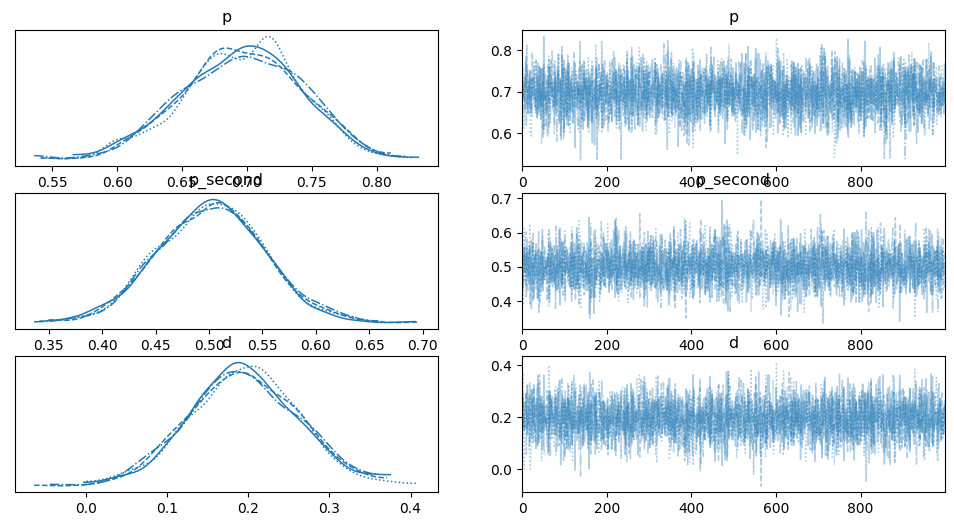

In [2]:
import arviz as az
import pymc3 as pm
import numpy as np


def the_thing(positive_first, negative_first, positive_second, negative_second):
    ones = np.ones(positive_first)
    zeros = np.zeros(negative_first)
    ones_second = np.ones(positive_second)
    zeros_second = np.zeros(negative_second)
    occurrences = np.concatenate((ones, zeros))
    occurences_second = np. concatenate((ones_second, zeros_second))

    with pm.Model() as model:
        p = pm.Uniform("p", lower=0, upper=1)
        p_second = pm.Uniform('p_second', lower=0, upper=1)

        obs = pm.Bernoulli("obs", p, observed=occurrences)
        obs_second = pm.Bernoulli('obs_second', p_second, observed=occurences_second)

        difference = pm.Deterministic('d', p - p_second)

        idata = pm.sample(return_inferencedata=True)

    az.plot_trace(idata, show=True)

the_thing(70, 30, 50, 50)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_second, p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 87 seconds.


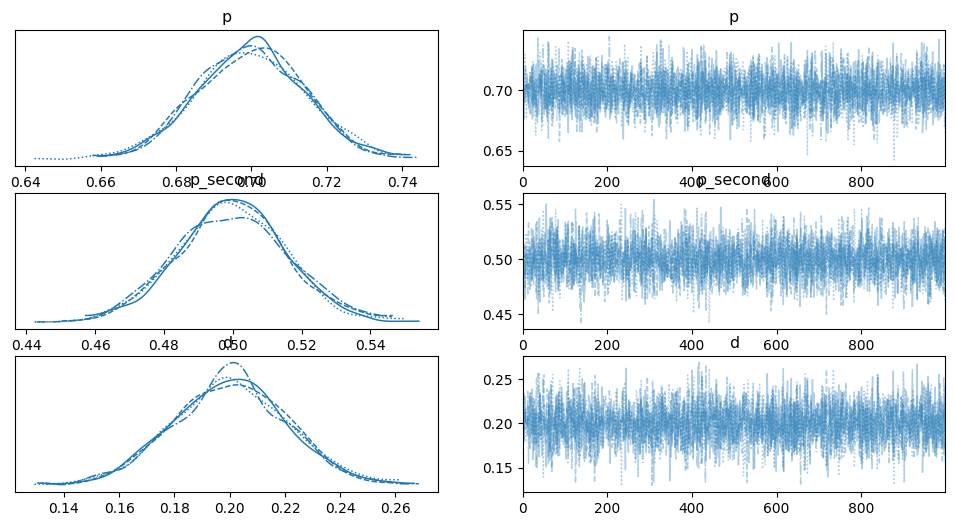

In [3]:
the_thing(700, 300, 500, 500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_second, p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


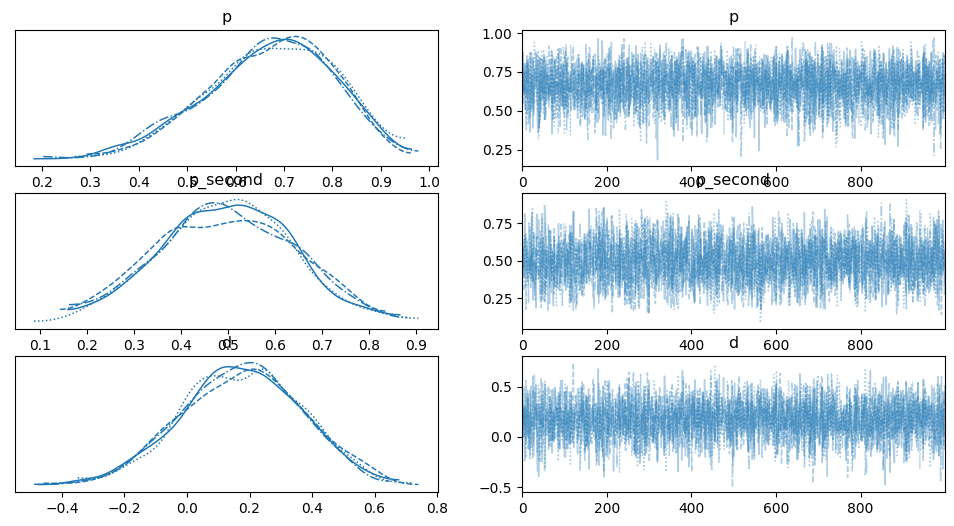

In [4]:
the_thing(7, 3, 5, 5)

Dla wszystkich 3 przypadków badań, z różną ilością przebadanych osób n = 1000, 100, i 10 odchylenie standardowe i parametr położenia są do siebie bardzo zbliżone. Dla n = 10 odchylenie standardowe zmiennej deterministycznej jest w umiarkowany sposób większe niż dla pozostałych przypadków.